# MLPRegressor

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Zad.

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [9]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
Wykonaj regresję z różnymi parametrami.

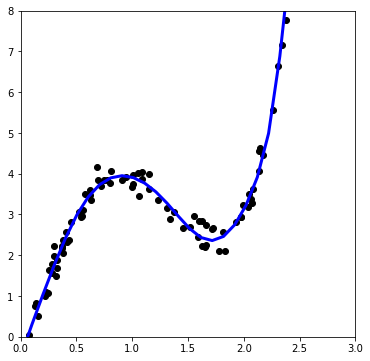

In [10]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

MLP = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')
y_rbf = MLP.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, MLP.predict(x_plot), color='blue',linewidth=3)
plt.show()



In [11]:
from sklearn import  metrics

metrics.r2_score(y, MLP.predict(x))

0.9515905477827911

# Zad. 
Wykonaj walidecję krzyżową.

# Zad.
wykonaj walidację krzyżową dla modelu MLPRegressor


In [12]:
import pandas as pd
df_adv = pd.read_csv('./datasets/Advertising.csv', index_col=0)
X = df_adv[['TV', 'Radio','Newspaper']]
y = df_adv['Sales']
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


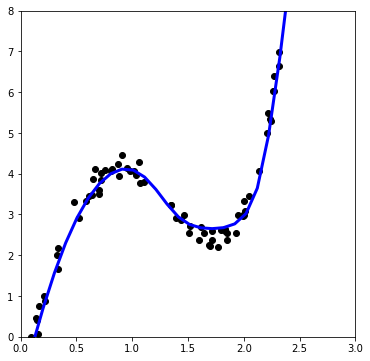

0.9865047932862752


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('mlpregressor',
                                        MLPRegressor(activation='tanh',
                                                     batch_size=20,
                                                     hidden_layer_sizes=(100,
                                                                         50,
                                                                         10),
                                                     learning_rate='adaptive',
                                                     max_iter=50000))]),
             param_grid={})

In [13]:
#zestaw E
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import  metrics
import pandas as pd
from sklearn import  metrics
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))
kfold = model_selection.KFold(n_splits=5)
grid_1 = GridSearchCV(make_pipeline(MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')),
                    cv=kfold,
                    param_grid={},
                    refit=True)
y_rbf = grid_1.fit(x,y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, grid_1.predict(x_plot), color='blue',linewidth=3)
plt.show()
print(metrics.r2_score(y, grid_1.predict(x)))
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
grid_1.fit(X,y)

In [14]:
from sklearn import  metrics
metrics.r2_score(y_true= y, y_pred= grid_1.best_estimator_.predict(X))

0.9792488944548304